# Unit 5 - Financial Planning


In [45]:
# Initial imports
# add json import
import json
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [46]:
# Load .env enviroment variables
# Expect "True" output if this is done correctly
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [47]:
# Set monthly household income
monthly_household_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [48]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [49]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"
#execute get request on btc & eth & store response as variable
#requests.get(btc_url)
#requests.get(eth_url)
btc_response_data = requests.get(btc_url)
eth_response_data = requests.get(eth_url)
#use json function from json library to format
#import json, added to initial imports list
btc_data = btc_response_data.json()
eth_data = eth_response_data.json()
#add indents (4) to JSON and output to screen for both btc & eth
print(json.dumps(btc_data, indent=4))
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18471525,
            "total_supply": 18471525,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11478.5,
                    "volume_24h": 23136904836,
                    "market_cap": 212033338735,
                    "percentage_change_1h": 0.383062570573621,
                    "percentage_change_24h": 0.354252900574891,
                    "percentage_change_7d": -3.94244280577138,
                    "percent_change_1h": 0.383062570573621,
                    "percent_change_24h": 0.354252900574891,
                    "percent_change_7d": -3.94244280577138
                }
            },
            "last_updated": 1598457554
        }
    },
    "metadata": {
        "timestamp": 1598457554,
        "num_cry

In [50]:
# Fetch current BTC price
# select current btc price from formatted json data & set as float
# use variable btc_price_current, keep "btc" at the beginning of all variables for quicker identification later
btc_price_current = float(btc_data['data']['1']['quotes']['USD']['price'])
# Fetch current ETH price
# select current eth price from formatted json data & set as float
#use variable eth_price_current, keep "eth" at the beginning of all variables for quicker identification
eth_price_current = float(eth_data['data']['1027']['quotes']['USD']['price'])
# Compute current value of my crpto
# values will equal my_btc*btc_price_current & my_eth*eth_price_current - set new variables
my_btc_value = my_btc*btc_price_current
my_eth_value = my_eth*eth_price_current

# Print current crypto wallet balance format to 0.2
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13774.20
The current value of your 5.3 ETH is $2066.26


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [51]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [52]:
# Set Alpaca API key and secret
# add api_key var using .getenv
# print var type for each key: expect "str" output if key was imported correctly
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type <class 'str'>


In [80]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-24", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
#print(df_portfolio.head())
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

                              AGG                                     SPY  \
                             open    high    low   close   volume    open   
2020-08-24 00:00:00-04:00  118.72  118.82  118.6  118.62  8887200  342.12   

                                                            
                          high       low   close    volume  
2020-08-24 00:00:00-04:00  343  339.4504  342.94  79073131  
Current AGG closing price: $118.62
Current SPY closing price: $342.94


In [54]:
# Compute the current value of shares
# my_value = shares*close_price
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17147.00
The current value of your 200 AGG shares is $23724.00


### Savings Health Analysis

In [55]:
#set two new variables for total amount of shares and total amount of crypto - my_shares_value & my_crypto_value
my_shares_value = my_agg_value+my_spy_value
my_crypto_value = my_btc_value+my_eth_value
# Create savings DataFrame
# Create dictionary "savings_value" Keys: amount, shares, crypto
savings_value = {   
    "amount":(my_shares_value,my_crypto_value),
    "shares": (my_shares_value),
    "crypto": (my_crypto_value)
}

# use savings_value dict and assign keys to index or columns
# index = "shares" & "crypto"
# columns = "amount"
df_savings = pd.DataFrame(savings_value, index=["shares", "crypto"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
shares,40871.000
crypto,15840.458


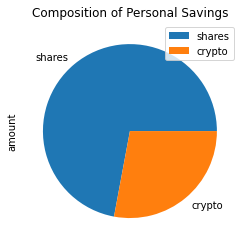

In [56]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [57]:
# Set ideal emergency fund
monthly_income = monthly_household_income
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_shares_value+my_crypto_value

# Validate saving health
# adjusted monthly_household_income & reran to check all options will print
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your savings fund!")
elif total_savings == emergency_fund:
    print("Congratulations!  You have reached your financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${(emergency_fund-total_savings)} away from reaching your savings goal of ${emergency_fund}!")

Congratulations! You have enough money in your savings fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [58]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-24', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2020-08-24', tz='America/Chicago').isoformat()

In [59]:
# Get 5 years' worth of historical data for SPY and AGG
# Create ticker var for SPY & AGG
ticker = ['SPY', 'AGG']
#set timeframe to 1D
timeframe = "1D"
#create dataframe "df_stock_data"
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
#df_stock_data = pd.DataFrame(df_historical)
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open     high     low    close   volume    open   
2015-08-24 00:00:00-04:00  110.00  110.340  109.57  109.730  5065966  187.33   
2015-08-25 00:00:00-04:00  109.70  109.700  109.13  109.450  3843124  195.43   
2015-08-26 00:00:00-04:00  109.08  109.410  108.88  108.950  3673170  192.08   
2015-08-27 00:00:00-04:00  108.95  109.195  108.93  109.100  3454665  197.02   
2015-08-28 00:00:00-04:00  109.34  109.370  108.93  109.001  4604866  198.50   

                                                               
                              high     low   close     volume  
2015-08-24 00:00:00-04:00  195.840  182.40  189.48  353841446  
2015-08-25 00:00:00-04:00  195.450  187.06  187.24  270267060  
2015-08-26 00:00:00-04:00  194.790  188.37  194.56  255843495  
2015-08-27 00:00:00-04:00  199.410  195.21  199.28  226847229  
2015-08-28 00:00:00-04:00  199.835  197.92  199.28  111959716

In [60]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Use MC_thirty year: need to call portfolio_data = df_stock_data
# weights = 60/40
# num_simulation = number of runs (500)
# num_trading_days = (always 252 days)*(number of years to run simulation=30)
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [61]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
2015-08-24 00:00:00-04:00  110.00  110.340  109.57  109.730  5065966   
2015-08-25 00:00:00-04:00  109.70  109.700  109.13  109.450  3843124   
2015-08-26 00:00:00-04:00  109.08  109.410  108.88  108.950  3673170   
2015-08-27 00:00:00-04:00  108.95  109.195  108.93  109.100  3454665   
2015-08-28 00:00:00-04:00  109.34  109.370  108.93  109.001  4604866   

                                           SPY                           \
                          daily_return    open     high     low   close   
2015-08-24 00:00:00-04:00          NaN  187.33  195.840  182.40  189.48   
2015-08-25 00:00:00-04:00    -0.002552  195.43  195.450  187.06  187.24   
2015-08-26 00:00:00-04:00    -0.004568  192.08  194.790  188.37  194.56   
2015-08-27 00:00:00-04:00     0.001377  197.02  199.410  195.21  199.28   
2015-08-28 00:00:00-04:00    -0.000907  198.50  199.835  197.92  199.28   

                                                   
                              volume daily_return  
2015-08-24 00:00:00-04:00  353841446          NaN  
2015-08-25 00:00:00-04:00  270267060    -0.011822  
2015-08-26 00:00:00-04:00  255843495     0.039094  
2015-08-27 00:00:00-04:00  226847229     0.024260  
2015-08-28 00:00:00-04:00  111959716     0.000000

In [62]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# .calc_cumulative_return function
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001660,1.003714,1.004391,1.001091,1.004603,1.004187,0.992959,0.996053,0.997121,0.993425,...,1.009796,1.001515,1.007416,1.001562,1.000314,1.005364,1.007425,1.005396,1.000719,1.011773
2,1.010412,1.000652,1.001750,0.999525,1.002511,1.000808,0.996890,0.991602,0.996172,0.991816,...,1.007797,0.991475,1.003146,1.004364,0.992483,1.005528,0.999167,1.007073,0.996951,1.015383
3,1.014152,0.995041,0.999558,0.993794,0.995003,1.002880,0.995598,0.989376,1.005378,0.994650,...,0.996880,0.991257,1.003353,1.008975,0.996741,1.005644,1.000648,1.014362,0.996013,1.022671
4,1.017008,0.987401,0.996240,1.000628,1.000473,0.997487,0.997337,0.988811,1.004702,0.993195,...,0.999419,0.992088,1.005828,1.002151,0.997002,0.995797,1.007635,1.020342,0.997958,1.021318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.652326,5.391560,5.332940,5.521617,12.905271,11.607654,12.731079,11.811981,3.179871,6.453047,...,3.588712,5.218330,5.263998,6.093176,6.160019,7.085782,9.272715,6.143132,6.423315,4.924046
7557,11.630342,5.429755,5.347344,5.520470,12.881866,11.563307,12.758717,11.782291,3.164137,6.442183,...,3.597919,5.235145,5.323169,6.077075,6.157144,7.090430,9.223202,6.152121,6.422814,4.889955
7558,11.650324,5.420720,5.322455,5.487839,12.815907,11.646809,12.786109,11.816318,3.165147,6.448622,...,3.598463,5.208597,5.325041,6.108285,6.146295,7.088702,9.152898,6.167531,6.378603,4.914566
7559,11.650425,5.430443,5.348101,5.508499,12.795266,11.628107,12.840949,11.919717,3.157140,6.462483,...,3.582406,5.254253,5.353021,6.140380,6.161186,7.092012,9.183812,6.145051,6.405198,4.906270


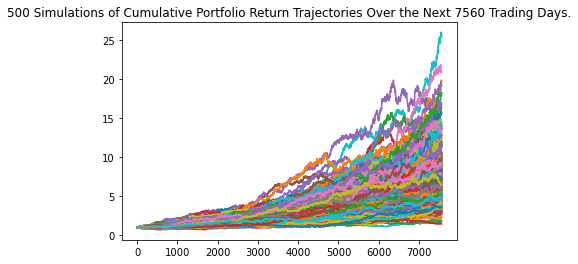

In [63]:
# Plot simulation outcomes
# updated line_plot to line_plot_thirty
line_plot_thirty = MC_thirtyyear.plot_simulation()


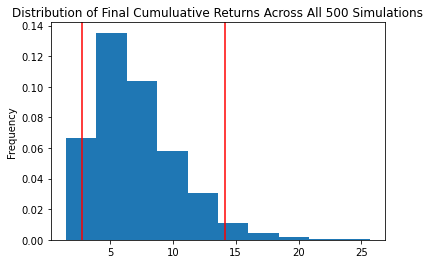

In [64]:
# Plot probability distribution and confidence intervals
# updated dist_plot to dist_plot_thirty
dist_plot_thirty = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
# changed tbl to tbl_thirty to keep code uniform
tbl_thirty = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl_thirty)

count           500.000000
mean              7.035606
std               3.292798
min               1.473921
25%               4.740482
50%               6.388561
75%               8.859986
max              25.704237
95% CI Lower      2.744538
95% CI Upper     14.117875
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [66]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# changed ci_lower to ci_lower_thirty & ci_upper to ci_upper_thirty to keep code uniform


ci_lower_thirty = round(tbl_thirty[8]*initial_investment)
ci_upper_thirty = round(tbl_thirty[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54891.0 and $282357.0


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [67]:
# Set initial investment
# updated initial investment to initial_investment_increase so initial_investment won't be overwritten in later code
initial_investment_increase = initial_investment*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000


ci_lower_thirty = round(tbl[8]*initial_investment_increase)
ci_upper_thirty = round(tbl[9]*initial_investment_increase)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $77036.0 and $430683.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# change num_trading_days = 252*5
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [69]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
2015-08-24 00:00:00-04:00  110.00  110.340  109.57  109.730  5065966   
2015-08-25 00:00:00-04:00  109.70  109.700  109.13  109.450  3843124   
2015-08-26 00:00:00-04:00  109.08  109.410  108.88  108.950  3673170   
2015-08-27 00:00:00-04:00  108.95  109.195  108.93  109.100  3454665   
2015-08-28 00:00:00-04:00  109.34  109.370  108.93  109.001  4604866   

                                           SPY                           \
                          daily_return    open     high     low   close   
2015-08-24 00:00:00-04:00          NaN  187.33  195.840  182.40  189.48   
2015-08-25 00:00:00-04:00    -0.002552  195.43  195.450  187.06  187.24   
2015-08-26 00:00:00-04:00    -0.004568  192.08  194.790  188.37  194.56   
2015-08-27 00:00:00-04:00     0.001377  197.02  199.410  195.21  199.28   
2015-08-28 00:00:00-04:00    -0.000907  198.50  199.835  197.92  199.28   

                                                   
                              volume daily_return  
2015-08-24 00:00:00-04:00  353841446          NaN  
2015-08-25 00:00:00-04:00  270267060    -0.011822  
2015-08-26 00:00:00-04:00  255843495     0.039094  
2015-08-27 00:00:00-04:00  226847229     0.024260  
2015-08-28 00:00:00-04:00  111959716     0.000000

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

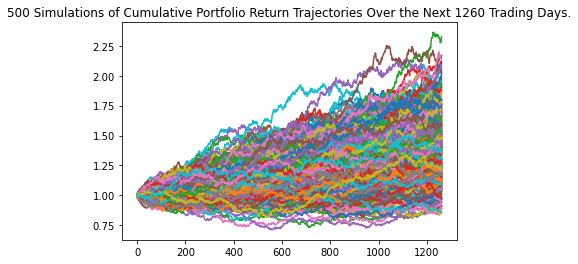

In [70]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_fiveyear.plot_simulation()

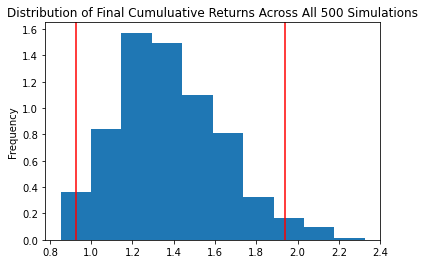

In [71]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_fiveyear.plot_distribution()

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.382095
std               0.258787
min               0.851235
25%               1.183921
50%               1.380558
75%               1.548626
max               2.326373
95% CI Lower      0.926951
95% CI Upper      1.937788
Name: 1260, dtype: float64


In [73]:
# Set initial investment
# previously set (20000)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(tbl_five[8]*initial_investment)
ci_upper_five = round(tbl_five[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18539.0 and $38756.0


### Ten Years Retirement Option

In [74]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# change num_trading_days = 252*10
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [75]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
2015-08-24 00:00:00-04:00  110.00  110.340  109.57  109.730  5065966   
2015-08-25 00:00:00-04:00  109.70  109.700  109.13  109.450  3843124   
2015-08-26 00:00:00-04:00  109.08  109.410  108.88  108.950  3673170   
2015-08-27 00:00:00-04:00  108.95  109.195  108.93  109.100  3454665   
2015-08-28 00:00:00-04:00  109.34  109.370  108.93  109.001  4604866   

                                           SPY                           \
                          daily_return    open     high     low   close   
2015-08-24 00:00:00-04:00          NaN  187.33  195.840  182.40  189.48   
2015-08-25 00:00:00-04:00    -0.002552  195.43  195.450  187.06  187.24   
2015-08-26 00:00:00-04:00    -0.004568  192.08  194.790  188.37  194.56   
2015-08-27 00:00:00-04:00     0.001377  197.02  199.410  195.21  199.28   
2015-08-28 00:00:00-04:00    -0.000907  198.50  199.835  197.92  199.28   

                                                   
                              volume daily_return  
2015-08-24 00:00:00-04:00  353841446          NaN  
2015-08-25 00:00:00-04:00  270267060    -0.011822  
2015-08-26 00:00:00-04:00  255843495     0.039094  
2015-08-27 00:00:00-04:00  226847229     0.024260  
2015-08-28 00:00:00-04:00  111959716     0.000000

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

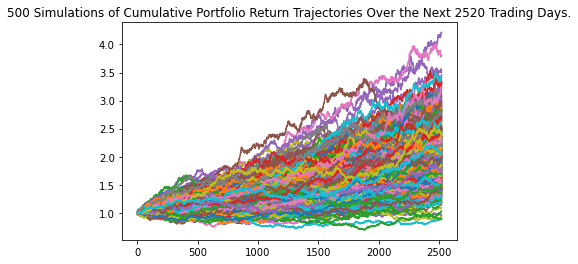

In [76]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

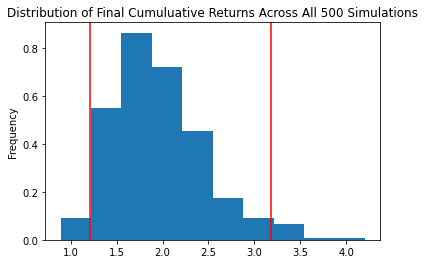

In [77]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_tenyear.plot_distribution()

In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_tenyear.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten)

count           500.000000
mean              1.954696
std               0.499864
min               0.889046
25%               1.603873
50%               1.886871
75%               2.220499
max               4.202945
95% CI Lower      1.208311
95% CI Upper      3.185462
Name: 2520, dtype: float64


In [79]:
# Set initial investment

ci_lower_ten = round(tbl_ten[8]*initial_investment)
ci_upper_ten = round(tbl_ten[9]*initial_investment)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24166.0 and $63709.0
